# Análisis y Reporte sobre el Desempeño del Modelo

---

### Héctor Hibran Tapia Fernández - A01661114

---

In [123]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### 2. Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula.

In [124]:
df = pd.read_csv("./Valhalla23.csv") 
semilla = np.random.seed(1114) # Ultimos 4 dígitos de mi matrícula
df

,Celsius,Valks
0,61.4720,-139.7400
1,70.5790,-156.6000
2,-7.3013,73.2690
3,71.3380,-165.4200
4,43.2360,-75.8350
...,...,...
95,-7.0094,69.6320
96,36.8820,-71.2400
97,26.9390,-34.2550
98,-18.8100,106.4300


### 3. Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba.

In [125]:
train_val_data, test_data = train_test_split(df, test_size = 0.2, random_state = semilla) # train_val_data: contiene el 80% de los datos (conjunto de entrenamiento y validación). - test_data: contiene el 20% de los datos (conjunto de prueba).
train_data, val_data = train_test_split(train_val_data, test_size = 0.5, random_state = semilla) # train_data: contiene el 50% de train_val_data, lo que equivale al 40% de los datos originales. - val_data: contiene el otro 50% de train_val_data, lo que equivale al 40% de los datos originales.

# print(f"Entrenamiento: {len(train_data)}, Validación: {len(val_data)}, Prueba: {len(test_data)}")

### 4. Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba.


In [126]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

X_train = train_data[['Celsius']]
y_train = train_data['Valks']

X_val = val_data[['Celsius']]
y_val = val_data['Valks']

X_test = test_data[['Celsius']]
y_test = test_data['Valks']

model = SGDRegressor(learning_rate = 'constant', eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
# model = make_pipeline(StandardScaler(), sgd_regressor) # Al descomentar la regresión sale "bien"
model.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000)

### 5. Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.



In [127]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Error cuadrático medio en validación: {mse_val}")
print(f"Error cuadrático medio en prueba: {mse_test}")
print(f"Error cuadrático medio en entrenamiento: {mse_train}")

Error cuadrático medio en validación: 1213.115476593805
Error cuadrático medio en prueba: 1374.1587364361264
Error cuadrático medio en entrenamiento: 906.2334217438034


### 6. Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


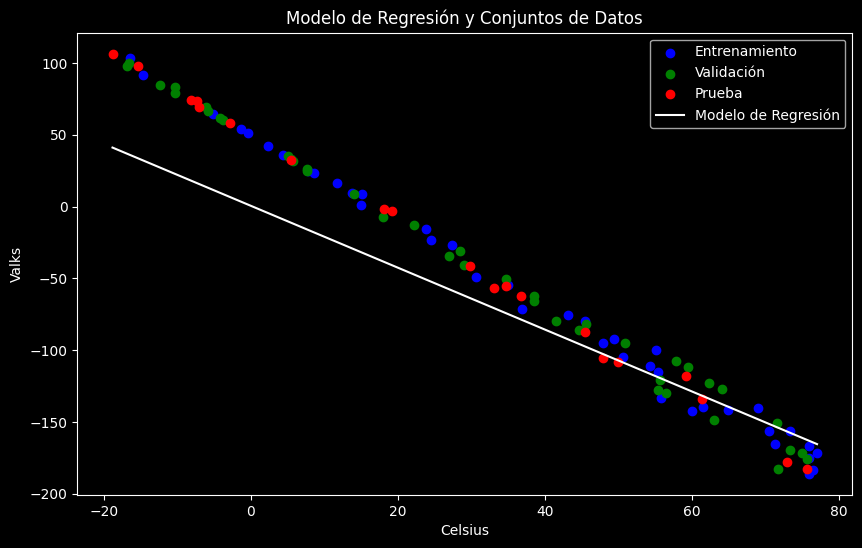

In [128]:
plt.style.use("dark_background")

X_todo = np.concatenate([X_train, X_val, X_test])
y_predict_todo = model.predict(X_todo)

plt.figure(figsize = (10, 6))
plt.scatter(X_train, y_train, color = 'blue', label = 'Entrenamiento')
plt.scatter(X_val, y_val, color = 'green', label = 'Validación')
plt.scatter(X_test, y_test, color = 'red', label = 'Prueba')
idx = np.argsort(X_todo[:, 0])
plt.plot(X_todo[idx], y_predict_todo[idx], color = 'white', label = 'Modelo de Regresión')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Modelo de Regresión y Conjuntos de Datos')
plt.legend()
plt.show()

### 7. Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

In [129]:
lista = random.sample(range(3, 40), 19)
lista.append(2) 
lista = sorted(lista)

lista

[2, 5, 6, 7, 9, 11, 12, 15, 16, 19, 21, 23, 25, 26, 27, 29, 31, 32, 37, 39]

### 8. Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento

In [130]:
resultados = {}

for tamanio in lista:
    valores_mse_train = []
    valores_mse_val = []
    
    for i in range(100):
        indices_subconjunto = np.random.choice(X_train.index, size = tamanio, replace = False)
        X_train_subconjunto = X_train.loc[indices_subconjunto]
        y_train_subconjunto = y_train.loc[indices_subconjunto]
        
        modelo = SGDRegressor(learning_rate = 'constant', eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
        modelo.fit(X_train_subconjunto, y_train_subconjunto)
        
        y_train_pred = modelo.predict(X_train_subconjunto)
        mse_entrenamiento = mean_squared_error(y_train_subconjunto, y_train_pred)
        valores_mse_train.append(mse_entrenamiento)
        
        y_val_pred = modelo.predict(X_val)
        mse_validacion = mean_squared_error(y_val, y_val_pred)
        valores_mse_val.append(mse_validacion)

    mse_promedio_train = np.mean(valores_mse_train)
    mse_promedio_val = np.mean(valores_mse_val)
    resultados[tamanio] = (mse_promedio_train, mse_promedio_val)

### 9. Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación

In [131]:
for tamanio, (mean_mse_train, mean_mse_val) in resultados.items():
    print(f"--------------------------")
    print(f"Tamaño del subconjunto: {tamanio}")
    print(f"MSE Promedio (Entrenamiento): {mean_mse_train:.4f}")
    print(f"MSE Promedio (Validación):    {mean_mse_val:.4f}")
    print(f"--------------------------")

--------------------------
Tamaño del subconjunto: 2
MSE Promedio (Entrenamiento): 53.4307
MSE Promedio (Validación):    4000.6260
--------------------------
--------------------------
Tamaño del subconjunto: 5
MSE Promedio (Entrenamiento): 145.2278
MSE Promedio (Validación):    318.4361
--------------------------
--------------------------
Tamaño del subconjunto: 6
MSE Promedio (Entrenamiento): 280.6431
MSE Promedio (Validación):    484.4807
--------------------------
--------------------------
Tamaño del subconjunto: 7
MSE Promedio (Entrenamiento): 506.7854
MSE Promedio (Validación):    780.1730
--------------------------
--------------------------
Tamaño del subconjunto: 9
MSE Promedio (Entrenamiento): 678.7582
MSE Promedio (Validación):    1023.5714
--------------------------
--------------------------
Tamaño del subconjunto: 11
MSE Promedio (Entrenamiento): 814.2019
MSE Promedio (Validación):    1143.5117
--------------------------
--------------------------
Tamaño del subconjunto

### 10. Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento

In [132]:
mse_promedios_train = []
mse_promedios_val = []

for tamanio, (mean_mse_train, mean_mse_val) in resultados.items():
    mse_promedios_train.append(mean_mse_train)
    mse_promedios_val.append(mean_mse_val)

print("Lista de MSE promedio en entrenamiento:")
print(mse_promedios_train)

print("\nLista de MSE promedio en validación:")
print(mse_promedios_val)

Lista de MSE promedio en entrenamiento:
[53.430741041691455, 145.22776162514748, 280.6430686201992, 506.7853878592965, 678.7582031762984, 814.2019375388944, 835.9686773263066, 866.415910289418, 863.7637905809371, 923.617757506941, 941.9525106680961, 911.6649988623327, 930.5392175445949, 919.7035255055415, 916.0928414709655, 907.7427968905744, 904.7367355889681, 900.7663222001644, 918.7161336525684, 912.9749895607914]

Lista de MSE promedio en validación:
[4000.6259600212775, 318.4360742779815, 484.48067666961816, 780.172997463728, 1023.5714464382522, 1143.5116534607764, 1184.55056660945, 1215.5231227809502, 1209.3900053790762, 1219.0492877251354, 1215.586405860236, 1228.4363308774198, 1224.274947981697, 1225.0697147548478, 1227.4773540902963, 1218.485416796134, 1211.4751509658024, 1222.347919499651, 1207.0410012586894, 1205.5329805833878]


### 11. Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base

In [133]:
mse_promedios_train.append(mse_train)  
mse_promedios_val.append(mse_val)    

print("Lista de MSE promedio en entrenamiento:")
print(mse_promedios_train)

print("\nLista de MSE promedio en validación:")
print(mse_promedios_val)

Lista de MSE promedio en entrenamiento:
[53.430741041691455, 145.22776162514748, 280.6430686201992, 506.7853878592965, 678.7582031762984, 814.2019375388944, 835.9686773263066, 866.415910289418, 863.7637905809371, 923.617757506941, 941.9525106680961, 911.6649988623327, 930.5392175445949, 919.7035255055415, 916.0928414709655, 907.7427968905744, 904.7367355889681, 900.7663222001644, 918.7161336525684, 912.9749895607914, 906.2334217438034]

Lista de MSE promedio en validación:
[4000.6259600212775, 318.4360742779815, 484.48067666961816, 780.172997463728, 1023.5714464382522, 1143.5116534607764, 1184.55056660945, 1215.5231227809502, 1209.3900053790762, 1219.0492877251354, 1215.586405860236, 1228.4363308774198, 1224.274947981697, 1225.0697147548478, 1227.4773540902963, 1218.485416796134, 1211.4751509658024, 1222.347919499651, 1207.0410012586894, 1205.5329805833878, 1213.115476593805]


### 12. Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento

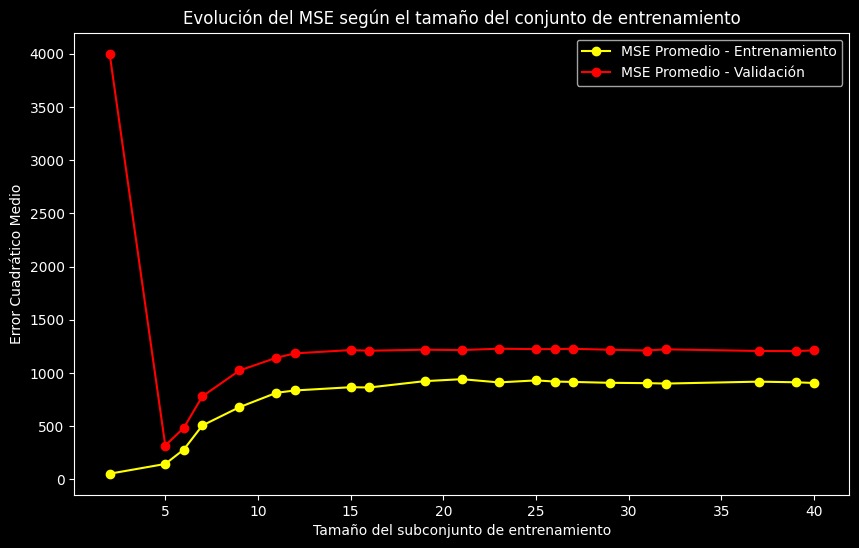

In [134]:
tamanios_entrenamiento = lista.copy()  
tamanios_entrenamiento.append(len(X_train))

plt.figure(figsize = (10, 6))
plt.plot(tamanios_entrenamiento, mse_promedios_train, label = "MSE Promedio - Entrenamiento", marker = 'o', linestyle = '-', color = 'yellow')
plt.plot(tamanios_entrenamiento, mse_promedios_val, label = "MSE Promedio - Validación", marker = 'o', linestyle = '-', color = 'red')
plt.xlabel("Tamaño del subconjunto de entrenamiento")
plt.ylabel("Error Cuadrático Medio")
plt.title("Evolución del MSE según el tamaño del conjunto de entrenamiento")
plt.legend()
plt.show()

### 13. Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

**Tipo de ajuste para el modelo entrenado con 2 muestras:**
- MSE del Entrenamiento: Como se ve la ve en la gráfica anterior inicia muy bajo en 53.43, porque solo tenemos 2 muestras, lo que nos dice que el modelo ajusta muy bien.
- MSE de Validación:  Como se ve la ve en la gráfica anterior inicia extremadamente alto en 4000, el modelo no generaliza como debería, tiene sobreajuste o alta varianza.

**Tipo de ajuste para el modelo entrenado con 40 muestras:**
- MSE del Entrenamiento: Como se ve la ve en la gráfica anterior en la iteración 40, marca 912.97, lo que nos dice que ajusta bien los datos.
- MSE de Validación: Como se ve la ve en la gráfica anterior en la iteración 40, marca 1205.53 este es algo mayor que el de entrenamiento, lo cual es esperado, ya que el modelo tiende a tener un rendimiento ligeramente peor en datos no vistos.

**Comportamiento dependiendo la cantidad de muestras:**
A medida que se incrementa el tamaño del subconjunto de entrenamiento, el sesgo disminuye lo que nos ayuda a mejorar el ajuste de los datos y la varianza también disminuye.
También a partir del tamaño 20 aproximadamente del subconjunto, el MSE en validación se estabiliza, lo que nos dice que agregar más datos no mejora el rendimiento.



### 14. Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección. 

Con base a la gráfica la cantidad de muestras que considero más adecuada es la linea donde es más estable, diría que al rededor de 30 a 35 muestras nos proporciona un buen balance entre el ajuste del modelo y una buena capacidad de generalización. El modelo ya ha aprendido suficiente información sin llegar a sobreajustarse a los datos de entrenamiento. Si agregamos más información esta no nos servirá de nada, solo nos hará gastar tiempo computacional y tiempo.

### 15. Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [135]:
tamanio_optimo = 35
indices_subconjunto_optimo = np.random.choice(X_train.index, size = tamanio_optimo, replace = False)

X_train_optimo = X_train.loc[indices_subconjunto_optimo]
y_train_optimo = y_train.loc[indices_subconjunto_optimo]

modelo_optimo = SGDRegressor(learning_rate = 'constant', eta0 = 1e-4, max_iter = 1000000, random_state = semilla)

modelo_optimo.fit(X_train_optimo, y_train_optimo)

y_train_optimo_pred = modelo_optimo.predict(X_train_optimo)
y_val_optimo_pred = modelo_optimo.predict(X_val)
y_test_optimo_pred = modelo_optimo.predict(X_test)

mse_train_optimo = mean_squared_error(y_train_optimo, y_train_optimo_pred)
mse_val_optimo = mean_squared_error(y_val, y_val_optimo_pred)
mse_test_optimo = mean_squared_error(y_test, y_test_optimo_pred)

resultados_mse_optimo = {"MSE en entrenamiento (35 muestras)": mse_train_optimo, "MSE en validación": mse_val_optimo,"MSE en prueba": mse_test_optimo}
resultados_mse_optimo

{'MSE en entrenamiento (35 muestras)': 981.3707863162269,
 'MSE en validación': 1270.850563174737,
 'MSE en prueba': 1377.7756855590155}

### 16. Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)

In [136]:
mse_linea_base_train = mse_train
mse_linea_base_val = mse_val
mse_linea_base_test = mse_test

comparacion_mse = {"Modelo Original - MSE en entrenamiento": mse_linea_base_train,
    "Nuevo modelo (35 muestras) - MSE en entrenamiento": mse_train_optimo,
    "Modelo Original - MSE en validación": mse_linea_base_val,
    "Nuevo modelo (35 muestras) - MSE en validación": mse_val_optimo,
    "Modelo Original - MSE en prueba": mse_linea_base_test,
    "Nuevo modelo (35 muestras) - MSE en prueba": mse_test_optimo}

comparacion_mse

{'Modelo Original - MSE en entrenamiento': 906.2334217438034,
 'Nuevo modelo (35 muestras) - MSE en entrenamiento': 981.3707863162269,
 'Modelo Original - MSE en validación': 1213.115476593805,
 'Nuevo modelo (35 muestras) - MSE en validación': 1270.850563174737,
 'Modelo Original - MSE en prueba': 1374.1587364361264,
 'Nuevo modelo (35 muestras) - MSE en prueba': 1377.7756855590155}

### 17. Argumenta cuál configuración funcionó mejor, y por qué

El modelo original tiene un MSE de entrenamiento más bajo en general, lo que indica que ajustó mejor los datos del conjunto de entrenamiento, esto es esperable, ya que se utilizó más datos para aprender. El Modelo Original funcionó mejor en mi caso, ya que nos dió un MSE más bajo en todos los conjuntos y aprovechó mejor el tamaño completo del conjunto de entrenamiento, también no hubo signos de sobreajuste. La razón de esto es que con más muestras, el modelo tiene más información para aprender patrones más precisos, lo que resulta en un menor sesgo sin un aumento significativo de la varianza.